In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data 

--2025-10-08 21:00:48--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.01s   

2025-10-08 21:00:48 (85.0 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
len(df)

9704

In [6]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

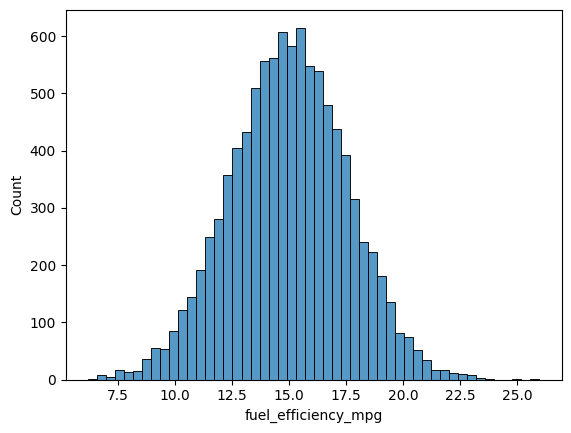

In [9]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [10]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [11]:
n = len(df)

In [12]:
df.horsepower.head()

0    159.0
1     97.0
2     78.0
3      NaN
4    140.0
Name: horsepower, dtype: float64

In [13]:
np.median(df.horsepower)

np.float64(nan)

In [14]:
median_hp = np.nanmedian(df.horsepower)
print(median_hp)

149.0


In [15]:

n = len(df)

n_val = int(n*0.2) 
n_test = int(n*0.2) 
n_train = n - n_val - n_test

n, n_val, n_test, n_train
#n, n_val+n_test+n_train

(9704, 1940, 1940, 5824)

In [16]:
#df_train = df.iloc[:n_train]
#df_val = df.iloc[n_train: n_train + n_val]
#df_test = df.iloc [n_train + n_val : ]

In [17]:
#df.iloc[:5]

In [18]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [19]:
#df_training = df.iloc[:n_training]
#df_val = df.iloc[n_training: n_training + n_val]
#df_test = df.iloc [n_training + n_val : ]

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc [idx[n_train + n_val : ]]

In [20]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [21]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
df_train[base]

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006
...,...,...,...,...
1696,260,139.0,2606.972984,2009
5685,280,132.0,4004.214323,2014
6735,210,152.0,2500.175687,2020
2052,250,154.0,2254.313245,2002


In [22]:
X_train = df_train[base].values

#mean_hp = df_train['horsepower'].mean()
#X_train = df_train[base].fillna(mean_hp).values
#df_train['horsepower'] = df_train['horsepower'].fillna(mean_hp)
#df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(mean_hp)

In [23]:
df_train[base].isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [24]:
df_train[base].fillna(0).isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [25]:
X_train = df_train[base].fillna(0).values
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)

In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
train_linear_regression(X_train, y_train)

(np.float64(3.664666247383519),
 array([ 2.14827083e-06,  2.21209296e-04, -3.23460699e-04,  1.64673231e-05]))

In [28]:
w0, w = train_linear_regression(X_train, y_train)

In [29]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

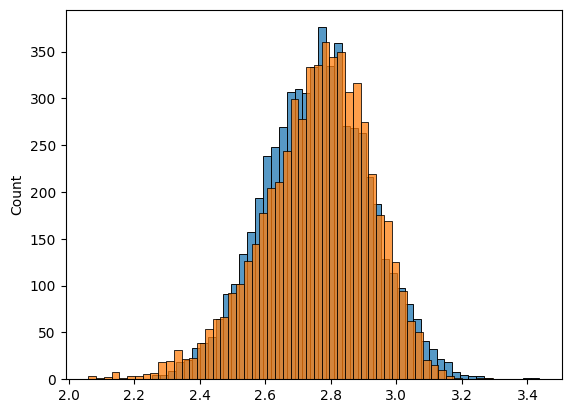

In [30]:
sns.histplot(y_pred)
sns.histplot(y_train)

In [31]:
def rmse(y, y_pred): 
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [32]:
rmse(y_train, y_pred)

np.float64(0.039086325392652485)

In [33]:
mean_hp = df_train['horsepower'].mean()
X_train = df_train[base].fillna(mean_hp).values

In [34]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)

In [35]:
train_linear_regression(X_train, y_train)

(np.float64(3.671000819646519),
 array([ 3.63140955e-06,  6.65758686e-04, -3.23242585e-04, -2.14173526e-05]))

In [36]:
w0, w = train_linear_regression(X_train, y_train)

In [37]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

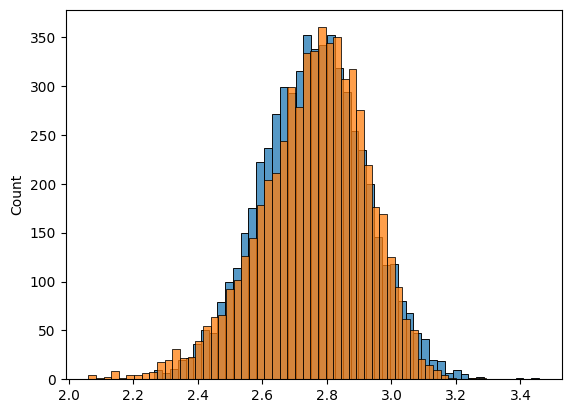

In [38]:
sns.histplot(y_pred)
sns.histplot(y_train)

In [39]:
rmse(y_train, y_pred)

np.float64(0.03581083785900231)

In [57]:
n = len(df)

n_val = int(n*0.2) 
n_test = int(n*0.2) 
n_train = n - n_val - n_test

n, n_val, n_test, n_train
#n, n_val+n_test+n_train

idx = np.arange(n)

#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc [idx[n_train + n_val : ]]

X_train = df_train[base].fillna(0).values
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)

X_test = df_test[base].fillna(0).values
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

w_test_0, w_test = train_linear_regression(X_test, y_test)
y_test_pred = w_test_0 + X_test.dot(w_test)


print ('rmse train', rmse(y_train, y_pred))
print ('rmse test', rmse(y_test, y_test_pred))

rmse train 0.03910175305182104
rmse test 0.039155664363735646


In [54]:
scores = [0.039100215045131115, 0.0388651074169436, 0.03902570026567232, 0.039245076044555065, 0.03918680725272193, 0.038843849137581224, 0.03883943031344286, 0.03940659525858261,0.039185005230288186,0.03910175305182104]  
std_dev = np.std(scores)
print("Standard Deviation:", std_dev, round(std_dev, 3))

Standard Deviation: 0.00017888503582220972 0.0


In [ ]:
[0.039100215045131115, 0.0388651074169436, 0.03902570026567232, 0.039245076044555065, 0.03918680725272193, 0.038843849137581224, 0.03883943031344286, 0.03940659525858261,0.039185005230288186,0.03910175305182104]  